In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
columns = ['Age','Workclass','fnlgwt','Education','Education num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Native country','Income']


In [3]:
train = pd.read_csv('C:/Users/Nischal Rajput/adult-training.csv', names=columns)


In [4]:
test= pd.read_csv('C:/Users/Nischal Rajput/adult-test.csv', names=columns, skiprows=1)

In [5]:
%matplotlib inline
train.isnull().sum()


Age               0
Workclass         0
fnlgwt            0
Education         0
Education num     0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours/Week        0
Native country    0
Income            0
dtype: int64

In [6]:
train.info()
train.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         32561 non-null object
fnlgwt            32561 non-null int64
Education         32561 non-null object
Education num     32561 non-null int64
Marital Status    32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital Gain      32561 non-null int64
Capital Loss      32561 non-null int64
Hours/Week        32561 non-null int64
Native country    32561 non-null object
Income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
Age               16281 non-null int64
Workclass         16281 non-null object
fnlgwt            16281 non-null int64
Education         16281 non-null object
Education num     16281 non-null int64
Marital Status    16281 non-null object
Occupation        16281 non-null object
Relationship      16281 non-null object
Race              16281 non-null object
Sex               16281 non-null object
Capital Gain      16281 non-null int64
Capital Loss      16281 non-null int64
Hours/Week        16281 non-null int64
Native country    16281 non-null object
Income            16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [8]:
train.replace(' ?', np.nan, inplace=True)

In [9]:

test.replace(' ?', np.nan, inplace=True)

In [10]:
train.isnull().sum()
train1= train['Age'].apply(np.sum, axis=0)


In [11]:
train['Income'] = train['Income'].apply(lambda x: 1 if x==' >50K' else 0)
test['Income'] = test['Income'].apply(lambda x: 1 if x==' >50K.' else 0)

(array([ 5570.,  5890.,  6048.,  6163.,  3967.,  2591.,  1595.,   496.,
          174.,    67.]),
 array([ 17. ,  24.3,  31.6,  38.9,  46.2,  53.5,  60.8,  68.1,  75.4,
         82.7,  90. ]),
 <a list of 10 Patch objects>)

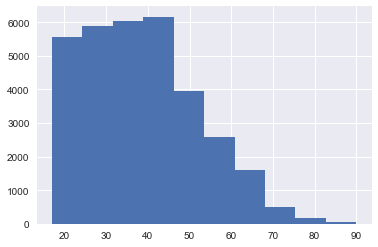

In [12]:
plt.hist(train['Age'])

In [13]:
train['Workclass'].fillna(0, inplace=True)

In [14]:
train.Workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
0                     1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [15]:
test['Workclass'].fillna(0, inplace = True)

(array([ 2862.,  2796.,  3072.,  2994.,  1998.,  1285.,   861.,   281.,
          103.,    29.]),
 array([ 17. ,  24.3,  31.6,  38.9,  46.2,  53.5,  60.8,  68.1,  75.4,
         82.7,  90. ]),
 <a list of 10 Patch objects>)

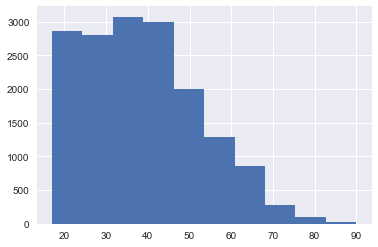

In [16]:
plt.hist(test.Age)

In [17]:
train.fnlgwt.describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlgwt, dtype: float64

In [18]:
train_income = pd.get_dummies(train['Income'])

In [19]:
train= pd.DataFrame(train,train_income,index=1)

TypeError: __init__() got multiple values for argument 'index'

In [ ]:
train()

In [ ]:
x=train.iloc[:,0:14]

In [ ]:
x

In [ ]:
Y= train.iloc[:,14:]

In [ ]:
Y

In [28]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( x, Y, test_size = 0.3, random_state = 0)

In [ ]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

In [ ]:
pd.get_dummies(train,prefix=['Native country'])

In [ ]:
train["Native country"] = train["Native country"].astype('category')
train["Sex"] = train["Sex"].astype('category')
train["Race"] = train["Race"].astype('category')

In [ ]:
train.info()

In [ ]:
train["Native country"] = train["Native country"].cat.codes
train["Sex"] = train["Sex"].cat.codes

In [ ]:
train

In [ ]:
x=train.iloc[:,0:14]

In [ ]:
x

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( x, Y, test_size = 0.3, random_state = 100)

In [ ]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(x,y)

In [ ]:
train.Race

In [36]:
X=train[['Education num','Age','Hours/Week']].values
y= train[['Income']].values
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.3, random_state=21, stratify=y)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
predn=clf.predict(X_test)
print('The accuracy of the model is',metrics.accuracy_score(predn,y_test))

The accuracy of the model is 0.770600880336


In [22]:
X

array([[13, 39, 40],
       [13, 50, 13],
       [ 9, 38, 40],
       ..., 
       [ 9, 58, 40],
       [ 9, 22, 20],
       [ 9, 52, 40]], dtype=int64)

In [ ]:
from sklearn import svm

svc = svm.SVC(kernel='linear')

svc.fit(X_train, y_train)

y_pred=svc.predict(X_test)

print("Test set predictions:\n {}".format(y_pred))
print(svc.score(X_test,y_test))

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid= {'n_neighbors': np.arange(1,80)}
knn = KNeighborsClassifier()
knn_cv=GridSearchCV(knn, param_grid, cv=5)
y = y.reshape(30718,)
knn_cv.fit(X, y)
print(knn_cv.best_params_)
print(knn_cv.best_score_)
model=KNeighborsClassifier(n_neighbors=78) 
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,y_test))

In [53]:
train['Occupation'] = train['Occupation'].map({'?': 0, 'Farming-fishing': 1, 'Tech-support': 2, 
                                                       'Adm-clerical': 3, 'Handlers-cleaners': 4, 'Prof-specialty': 5,
                                                       'Machine-op-inspct': 6, 'Exec-managerial': 7, 
                                                       'Priv-house-serv': 8, 'Craft-repair': 9, 'Sales': 10, 
                                                       'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13, 
                                                       'Protective-serv': 14}).astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [51]:
train.head(n=200)


,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,NaN,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,NaN,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,NaN,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,NaN,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,NaN,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,NaN,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,NaN,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,NaN,Husband,White,Male,5178,0,40,United-States,1
